In [34]:
import pandas as pd
import numpy as np

In [35]:
df = pd.read_csv("PL cluster analysis(1).csv")

In [36]:
df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,Matches,SCA,SCA90,...,Def,GCA,GCA90,PassLive.1,PassDead.1,Drib.1,Sh.1,Fld.1,Def.1,Matches.1
0,1.0,David de Gea,es ESP,GK,Manchester Utd,31-182,1990.0,37.0,3.0,0.08,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,Matches
1,2.0,Hugo Lloris,fr FRA,GK,Tottenham,35-133,1986.0,35.0,6.0,0.17,...,0.0,2.0,0.06,2.0,0.0,0.0,0.0,0.0,0.0,Matches
2,3.0,José Sá,pt POR,GK,Wolves,29-111,1993.0,35.0,3.0,0.09,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,Matches
3,4.0,Robert Sánchez,es ESP,GK,Brighton,24-171,1997.0,35.0,4.0,0.11,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,Matches
4,5.0,Pontus Jansson,se SWE,DF,Brentford,31-084,1991.0,34.9,15.0,0.43,...,0.0,4.0,0.11,1.0,0.0,0.0,2.0,1.0,0.0,Matches


In [37]:
df.shape

(500, 25)

In [38]:
df.describe().columns # numeric variables

Index(['Rk', 'Born', 'Matches', 'SCA', 'SCA90', 'PassLive', 'PassDead', 'Drib',
       'Sh', 'Fld', 'Def', 'GCA', 'GCA90', 'PassLive.1', 'PassDead.1',
       'Drib.1', 'Sh.1', 'Fld.1', 'Def.1'],
      dtype='object')

In [39]:
df = df[['Rk', 'Player', 'Born', 'Matches', 'SCA', 'SCA90', 'PassLive', 'PassDead', 'Drib',
       'Sh', 'Fld', 'Def', 'GCA', 'GCA90', 'PassLive.1', 'PassDead.1',
       'Drib.1', 'Sh.1', 'Fld.1', 'Def.1']]

In [40]:
df.head()

,Rk,Player,Born,Matches,SCA,SCA90,PassLive,PassDead,Drib,Sh,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,Drib.1,Sh.1,Fld.1,Def.1
0,1.0,David de Gea,1990.0,37.0,3.0,0.08,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,Hugo Lloris,1986.0,35.0,6.0,0.17,6.0,0.0,0.0,0.0,0.0,0.0,2.0,0.06,2.0,0.0,0.0,0.0,0.0,0.0
2,3.0,José Sá,1993.0,35.0,3.0,0.09,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,Robert Sánchez,1997.0,35.0,4.0,0.11,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,Pontus Jansson,1991.0,34.9,15.0,0.43,7.0,0.0,0.0,7.0,1.0,0.0,4.0,0.11,1.0,0.0,0.0,2.0,1.0,0.0


In [41]:
df = df[df.Matches > 10] # extracting players with at least 10 matches played
df = df[df.SCA > 100] # extracting players with at least 40 SCA

df

,Rk,Player,Born,Matches,SCA,SCA90,PassLive,PassDead,Drib,Sh,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,Drib.1,Sh.1,Fld.1,Def.1
8,9.0,James Ward-Prowse,1994.0,33.7,113.0,3.35,55.0,51.0,0.0,3.0,1.0,3.0,7.0,0.21,3.0,4.0,0.0,0.0,0.0,0.0
9,10.0,Bruno Fernandes,1994.0,33.6,143.0,4.26,108.0,18.0,4.0,6.0,4.0,3.0,10.0,0.30,8.0,0.0,1.0,1.0,0.0,0.0
18,19.0,Harry Kane,1993.0,32.9,105.0,3.19,78.0,2.0,9.0,8.0,6.0,2.0,19.0,0.58,15.0,0.0,1.0,3.0,0.0,0.0
39,40.0,Son Heung-min,1992.0,30.6,116.0,3.79,69.0,30.0,4.0,7.0,5.0,1.0,13.0,0.42,8.0,3.0,0.0,0.0,2.0,0.0
50,51.0,Mohamed Salah,1992.0,30.1,128.0,4.25,89.0,0.0,20.0,15.0,3.0,1.0,25.0,0.83,17.0,0.0,5.0,2.0,1.0,0.0
56,57.0,Trent Alexander-Arnold,1998.0,29.7,139.0,4.68,80.0,50.0,4.0,4.0,1.0,0.0,17.0,0.57,11.0,5.0,0.0,1.0,0.0,0.0
57,58.0,Bukayo Saka,2001.0,29.5,126.0,4.27,87.0,13.0,11.0,6.0,8.0,1.0,14.0,0.47,8.0,2.0,0.0,1.0,3.0,0.0
64,65.0,Bernardo Silva,1994.0,29.0,117.0,4.03,91.0,3.0,11.0,6.0,6.0,0.0,12.0,0.41,9.0,1.0,0.0,1.0,1.0,0.0
65,66.0,Raphael Dias Belloli,1996.0,28.9,109.0,3.77,60.0,20.0,13.0,9.0,5.0,2.0,7.0,0.24,4.0,0.0,2.0,0.0,1.0,0.0
68,69.0,Allan Saint-Maximin,1997.0,28.5,109.0,3.82,70.0,2.0,22.0,5.0,7.0,3.0,8.0,0.28,6.0,0.0,0.0,1.0,1.0,0.0


In [42]:
pd.set_option('display.max_rows', 70)
df.isnull().sum()

Rk            0
Player        0
Born          0
Matches       0
SCA           0
SCA90         0
PassLive      0
PassDead      0
Drib          0
Sh            0
Fld           0
Def           0
GCA           0
GCA90         0
PassLive.1    0
PassDead.1    0
Drib.1        0
Sh.1          0
Fld.1         0
Def.1         0
dtype: int64

In [43]:
df = df.fillna(df.mean())


/var/folders/st/4y9f4v3j053640l45_zcykd40000gn/T/ipykernel_16187/513357919.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


In [44]:
df.isnull().sum()


Rk            0
Player        0
Born          0
Matches       0
SCA           0
SCA90         0
PassLive      0
PassDead      0
Drib          0
Sh            0
Fld           0
Def           0
GCA           0
GCA90         0
PassLive.1    0
PassDead.1    0
Drib.1        0
Sh.1          0
Fld.1         0
Def.1         0
dtype: int64

In [45]:
names = df.Player.tolist() # saving names for later

df = df.drop(['Player'], axis = 1) # drop the short_name column 

In [46]:
df.head()

,Rk,Born,Matches,SCA,SCA90,PassLive,PassDead,Drib,Sh,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,Drib.1,Sh.1,Fld.1,Def.1
8,9.0,1994.0,33.7,113.0,3.35,55.0,51.0,0.0,3.0,1.0,3.0,7.0,0.21,3.0,4.0,0.0,0.0,0.0,0.0
9,10.0,1994.0,33.6,143.0,4.26,108.0,18.0,4.0,6.0,4.0,3.0,10.0,0.30,8.0,0.0,1.0,1.0,0.0,0.0
18,19.0,1993.0,32.9,105.0,3.19,78.0,2.0,9.0,8.0,6.0,2.0,19.0,0.58,15.0,0.0,1.0,3.0,0.0,0.0
39,40.0,1992.0,30.6,116.0,3.79,69.0,30.0,4.0,7.0,5.0,1.0,13.0,0.42,8.0,3.0,0.0,0.0,2.0,0.0
50,51.0,1992.0,30.1,128.0,4.25,89.0,0.0,20.0,15.0,3.0,1.0,25.0,0.83,17.0,0.0,5.0,2.0,1.0,0.0


In [47]:
from sklearn import preprocessing

x = df.values # numpy array
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) # 2D PCA for the plot
reduced = pd.DataFrame(pca.fit_transform(X_norm))

In [49]:
from sklearn.cluster import KMeans

# specify the number of clusters
kmeans = KMeans(n_clusters=5)

# fit the input data
kmeans = kmeans.fit(reduced)

# get the cluster labels
labels = kmeans.predict(reduced)

# centroid values
centroid = kmeans.cluster_centers_

# cluster values
clusters = kmeans.labels_.tolist()

In [50]:
reduced['cluster'] = clusters
reduced['Player'] = names
reduced.columns = ['x', 'y', 'cluster', 'name']
reduced.head()

,x,y,cluster,name
0,-1.290572,-0.439303,0,James Ward-Prowse
1,0.013514,-0.310113,3,Bruno Fernandes
2,0.864775,-0.432123,1,Harry Kane
3,-0.385338,0.078730,3,Son Heung-min
4,1.588756,0.473846,4,Mohamed Salah


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/scisports/opt/anaconda3/lib/python3.9/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


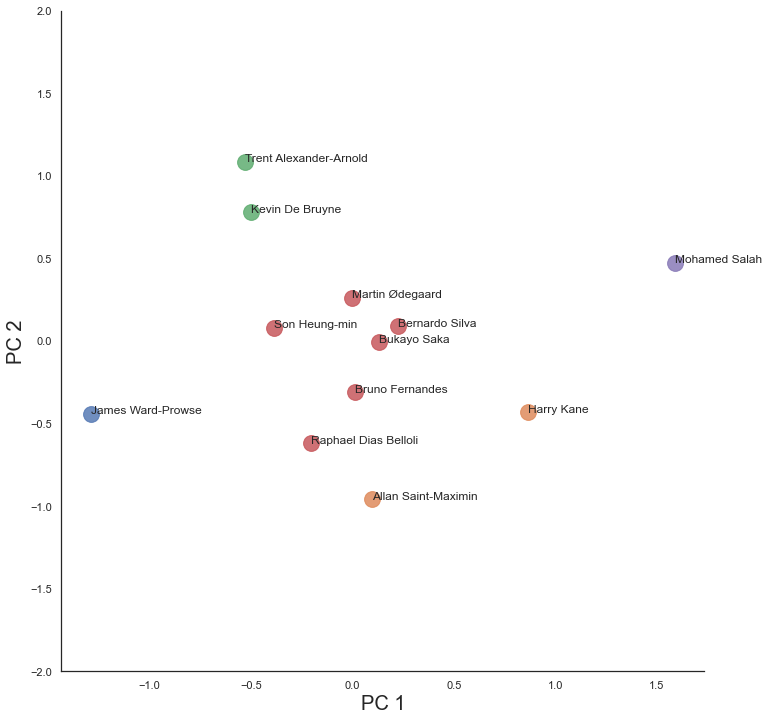

In [55]:
sns.set(style="white")

ax = sns.lmplot(x="x", y="y", hue='cluster', data = reduced, legend=False,
                   fit_reg=False, size = 10, scatter_kws={"s": 250})

texts = []
for x, y, s in zip(reduced.x, reduced.y, reduced.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()